In [1]:
import numpy as np
import unyt
import swiftsimio as sw
from velociraptor import load
import swiftgalaxy as sg
import functions as fn
from swiftgalaxy import SWIFTGalaxy, MaskCollection
import h5py

In [ ]:
dir="/mnt/su3-pro/flamingo/L0200N0360/"

data_h=load(dir+"VR/halos_0008.properties.0")
radius=data_h.radii.rvir

is_mainhalo=data_h.centrals
halo_id=data_h.ids.id-1
mass=data_h.masses.mass_tot
xc=data_h.positions.xcmbp
yc=data_h.positions.ycmbp
zc=data_h.positions.zcmbp
data_h=[]
mainhalo_id=halo_id[is_mainhalo*(mass>10000)]
print(len(mainhalo_id))


77


In [4]:
#Colibre
#[  1,   3, 122, 127], S<-0.5
soap_dir="../../../mnt/su3-pro/colibre/L0012N0094/THERMAL_AGN/SOAP/"

data_h=sw.load(soap_dir+"/halo_properties_0127.hdf5")
host_id=data_h.soap.host_halo_index#central halo=-1\
halo_id=np.arange(0,len(host_id),1)
mass=data_h.spherical_overdensity_200_crit.total_mass
radius=data_h.bound_subhalo.enclose_radius
xc=data_h.bound_subhalo.centre_of_mass[:,0]
yc=data_h.bound_subhalo.centre_of_mass[:,1]
zc=data_h.bound_subhalo.centre_of_mass[:,2]
print(mass[0])
mainhalo_id=halo_id[(host_id==-1)*(mass>1)]
m_pdm=1.937#10^7
m_pg=1.493#10^7
m_ps=1.124#10^7

0.08654785 10000000000.0*Msun (Physical)


/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a**0.0 at a=0.9999999999999997) for all arguments.
  warnings.warn(
/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (1 at a=0.9999999999999997) for all arguments.
  warnings.warn(


In [3]:
id=749
print(mass[id])
centre=np.array([xc[id],yc[id],zc[id]])*unyt.Mpc
r=radius[id]
print(r)
sgi=sg.SWIFTGalaxy(dir+"/snapshots/flamingo_0008.hdf5",
                   sg.Standalone(centre=centre,velocity_centre=np.array([0,0,0])*
                                 unyt.km/unyt.s,spatial_offsets=[[-r,r],[-r,r],[-r,r]],extra_mask=None))
#could also use MaskCollection to constrain T


711.4821042843049 10000000000.0*Msun
2.097370857876812 1000.0*kpc


/home/jyang/anaconda3/envs/myenv/lib/python3.12/site-packages/swiftsimio/_array_functions.py:438: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a at a=1.0) for all arguments.
  warnings.warn(
/home/jyang/anaconda3/envs/myenv/lib/python3.12/site-packages/swiftgalaxy/reader.py:2087: RuntimeWarning: Translation assumed to be in comoving (not physical) coordinates.
  warn(


In [4]:
mask=sg.MaskCollection(dark_matter=sgi.dark_matter.spherical_coordinates.r<r,
                       gas=sgi.gas.spherical_coordinates.r<r,
                       stars=sgi.stars.spherical_coordinates.r<r)
sgi.mask_particles(mask)
x_dm=np.array(sgi.dark_matter.cartesian_coordinates.x)
y_dm=np.array(sgi.dark_matter.cartesian_coordinates.y)
z_dm=np.array(sgi.dark_matter.cartesian_coordinates.z)
x_g=np.array(sgi.gas.cartesian_coordinates.x)
y_g=np.array(sgi.gas.cartesian_coordinates.y)
z_g=np.array(sgi.gas.cartesian_coordinates.z)
print(x_dm)
print(fn.offset(x_dm,y_dm,z_dm,x_g,y_g,z_g))

/home/jyang/anaconda3/envs/myenv/lib/python3.12/site-packages/unyt/array.py:1972: RuntimeWarning: invalid value encountered in divide
  out_arr = func(
/home/jyang/anaconda3/envs/myenv/lib/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor ((a**2.0)**0.5 at a=1.0) for all arguments.
  warnings.warn(


[-2.05859155 -2.02436257 -2.03356627 ...  1.29673322  1.29567761
  1.2474904 ]
0.2579557629280825


In [29]:
#Colibre
id=509
centre=np.array([xc[id],yc[id],zc[id]])*unyt.Mpc
print(centre)
r=radius[id]

sgi=sg.SWIFTGalaxy(soap_dir+"colibre_with_SOAP_membership_0127.hdf5",#dir+"/snapshots/flamingo_0008.hdf5",
                   sg.Standalone(centre=centre,velocity_centre=np.array([0,0,0])*
                                 unyt.km/unyt.s,spatial_offsets=[[-r,r],[-r,r],[-r,r]],extra_mask=None))
mask=sg.MaskCollection(dark_matter=sgi.dark_matter.spherical_coordinates.r<r,
                        gas=(sgi.gas.spherical_coordinates.r<r),
                      stars=sgi.stars.spherical_coordinates.r<r)
sgi.mask_particles(mask)
sgi2=sg.SWIFTGalaxy(soap_dir+"colibre_with_SOAP_membership_0127.hdf5",
    sg.SOAP(soap_dir+"/halo_properties_0127.hdf5",soap_index=id,extra_mask=None))
x_dm=np.array(sgi.dark_matter.cartesian_coordinates.x)
x_dm2=np.array(sgi2.dark_matter.cartesian_coordinates.x)
y_dm2=np.array(sgi2.dark_matter.cartesian_coordinates.y)
#r=np.array(sgi.dark_matter.spherical_coordinates.r)
#r2=np.array(sgi2.dark_matter.spherical_coordinates.r)
y_dm=np.array(sgi.dark_matter.cartesian_coordinates.y)
z_dm=np.array(sgi.dark_matter.cartesian_coordinates.z)
x_g=np.array(sgi.gas.cartesian_coordinates.x)
y_g=np.array(sgi.gas.cartesian_coordinates.y)
z_g=np.array(sgi.gas.cartesian_coordinates.z)

#print(len(sgi.gas.spherical_coordinates.r))


[ 0.26789707 11.907679    8.20078   ] Mpc


/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:438: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a at a=0.9999999999999997) for all arguments.
  warnings.warn(
/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftgalaxy/reader.py:2087: RuntimeWarning: Translation assumed to be in comoving (not physical) coordinates.
  warn(


In [30]:
#print(np.average(x_dm)/len(x_dm),np.average(x_dm2)/len(x_dm2))
#print(np.average(y_dm)/len(y_dm),np.average(y_dm2)/len(y_dm2))

x_g2=np.array(sgi2.gas.cartesian_coordinates.x)
y_g2=np.array(sgi2.gas.cartesian_coordinates.y)
z_g2=np.array(sgi2.gas.cartesian_coordinates.z)
z_dm2=np.array(sgi2.dark_matter.cartesian_coordinates.z)
print(fn.offset(x_dm,y_dm,z_dm,x_g,y_g,z_g))
print(fn.offset(x_dm2,y_dm2,z_dm2,x_g2,y_g2,z_g2))

0.19111015705550927
0.13160334443755853


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2.02483993e+00, -2.01674150e+00, -2.00864307e+00, -2.00054463e+00,
        -1.99244620e+00, -1.98434777e+00, -1.97624934e+00, -1.96815091e+00,
        -1.96005248e+00, -1.95195404e+00, -1.94385561e+00, -1.93575718e+00,
        -1.92765875e+00, -1.91956032e+00, -1.91146188e+00, -1.90336345e+00,
        -1.89526502e+00, -1.88716659e+00, -1.87906816e+00, -1.87096973e+00,
        -1.86287129e+00, -1.85477286e+00, -1.84667443e+00, -1.83857600e+00,
        -1.83047757e+00, -1.82237913e+00, -1.81428070e+00, -1.80618227e+00,
        -1.79808384e+00, -1.78998541e+00, -1.78188698e+00, -1.77378854e+00,
        -1.76569011e+00, -1.75759168e+00, -1.74949325e+00, -1.74139482e+00,
        -1.73329638e+00, -1.72519795e+00, -1.71709952e+00, -1.70900

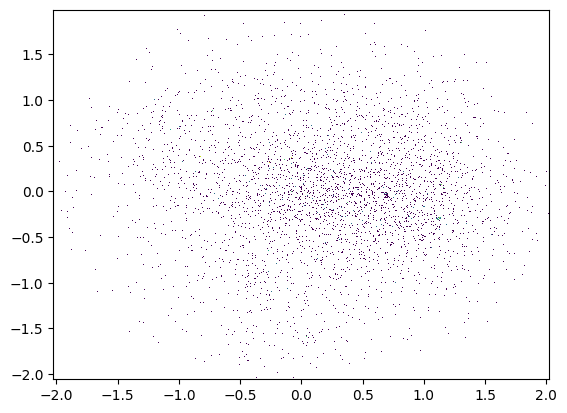

In [5]:
import matplotlib.pyplot as plt
from matplotlib import colors

fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.hist2d(x_g,y_g,norm=colors.LogNorm(),bins=500)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2.05859155, -2.05050486, -2.04241817, -2.03433148, -2.02624479,
        -2.0181581 , -2.01007141, -2.00198472, -1.99389803, -1.98581134,
        -1.97772465, -1.96963796, -1.96155127, -1.95346458, -1.94537789,
        -1.93729121, -1.92920452, -1.92111783, -1.91303114, -1.90494445,
        -1.89685776, -1.88877107, -1.88068438, -1.87259769, -1.864511  ,
        -1.85642431, -1.84833762, -1.84025093, -1.83216424, -1.82407755,
        -1.81599086, -1.80790417, -1.79981749, -1.7917308 , -1.78364411,
        -1.77555742, -1.76747073, -1.75938404, -1.75129735, -1.74321066,
        -1.73512397, -1.72703728, -1.71895059, -1.7108639 , -1.70277721,
        -1.69469052, -1.68660383, -1.67851714, -1.67043045, -1.66234377,
        -1.65425708, 

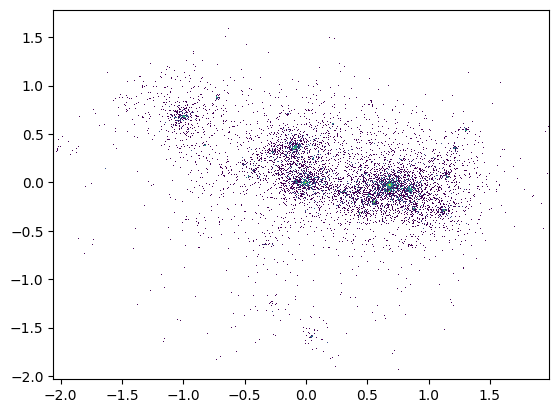

In [6]:

fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.hist2d(x_dm,y_dm,norm=colors.LogNorm(),bins=500)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 cosmo_array([-1.16874645, -1.16365122, -1.158556  , -1.15346078, -1.14836556,
        -1.14327034, -1.13817511, -1.13307989, -1.12798467, -1.12288945,
        -1.11779422, -1.112699  , -1.10760378, -1.10250856, -1.09741334,
        -1.09231811, -1.08722289, -1.08212767, -1.07703245, -1.07193723,
        -1.066842  , -1.06174678, -1.05665156, -1.05155634, -1.04646112,
        -1.04136589, -1.03627067, -1.03117545, -1.02608023, -1.020985  ,
        -1.01588978, -1.01079456, -1.00569934, -1.00060412, -0.99550889,
        -0.99041367, -0.98531845, -0.98022323, -0.97512801, -0.97003278,
        -0.96493756, -0.95984234, -0.95474712, -0.9496519 , -0.94455667,
        -0.93946145, -0.93436623, -0.92927101, -0.92417579, -0.91908056,
        -0.9139

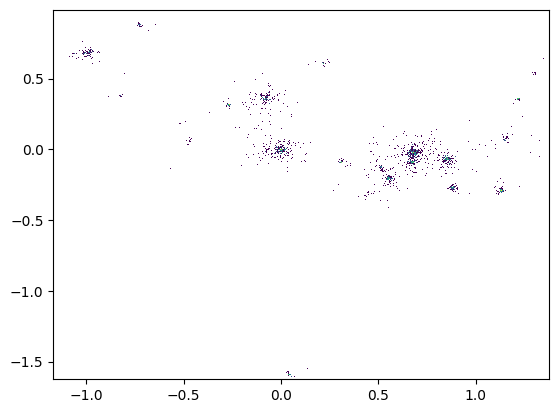

In [7]:
x_s=sgi.stars.cartesian_coordinates.x
y_s=sgi.stars.cartesian_coordinates.y
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.hist2d(x_s,y_s,norm=colors.LogNorm(),bins=500)